In [1]:
import deeplake
from PIL import Image
import numpy as np # linear algebra
import matplotlib.pyplot as plt

C:\Users\Giorgia\anaconda3\envs\thesis\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.2.1) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [2]:
'''ds = deeplake.load('hub://activeloop/mnist-train')
ds.tensors.keys()
ds_view.save_view(message = 'Samples with 0 and 8')
views = ds.get_views()
print(views)
print(len(ds_view))'''

"ds = deeplake.load('hub://activeloop/mnist-train')\nds.tensors.keys()\nds_view.save_view(message = 'Samples with 0 and 8')\nviews = ds.get_views()\nprint(views)\nprint(len(ds_view))"

# Import DATASET
## Adience
https://datasets.activeloop.ai/docs/ml/datasets/adience-dataset/
https://talhassner.github.io/home/projects/Adience/Adience-data.html
https://paperswithcode.com/dataset/adience

In [4]:
# Create a local copy of the dataset
# ds = deeplake.deepcopy('hub://activeloop/adience', './adience') 

# Load the local copy
#ds = deeplake.load('./adience')

# Load the remote copy
# https://datasets.activeloop.ai/docs/ml/datasets/adience-dataset/
ds = deeplake.load('hub://activeloop/adience')

n_tot_images = 19370

hub://activeloop/adience loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/adience


In [5]:
#ds.visualize()

In [6]:
ds.tensors.keys()

dict_keys(['ages', 'dx', 'dy', 'fiducial_score', 'fiducial_yaw_angle', 'genders', 'images', 'tilt_ang', 'x', 'y'])

In [7]:
@deeplake.compute
def filter_ages(sample_in, ages_list):
    return sample_in.ages.data()['text'][0] in ages_list

@deeplake.compute
def filter_genders(sample_in, genders_list):
    return sample_in.genders.data()['text'][0] in genders_list

"class_names": [
  "(25, 32)",
  "(38, 43)",
  "(4, 6)",
  "(60, 100)",
  "(15, 20)",
  "(48, 53)",
  "(8, 12)",
  "(0, 2)",
  "None",
  "(38, 48)",
  "35",
  "3",
  "55",
  "58",
  "22",
  "13",
  "45",
  "36",
  "23",
  "(38, 42)",
  "(8, 23)",
  "(27, 32)",
  "57",
  "56",
  "2",
  "29",
  "34",
  "42",
  "46",
  "32"
 ]

In [8]:
ds_view = []

ages_list = ["(0, 2)", "2", "3"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))

ages_list = ["(4, 6)"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))

ages_list = ["(8, 12)", "13"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))

ages_list = ["(15, 20)", "22", "23"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))

ages_list = ["(25, 32)", "29", "32", "(27, 32)"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))

ages_list = ["34", "35", "(38, 43)", "(38, 42)", "36", "42"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))

ages_list = ["45","(48, 53)", "46"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))

ages_list = ["55", "56", "57", "58"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))

ages_list = ["(60,100)"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))

ages_list = ["None"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))

# without a group: "(38, 48)", "(8, 23)"
ages_list = ["(38, 48)"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))

ages_list = ["(8, 23)"] # Desired ages for filtering
ds_view.append(ds.filter(filter_ages(ages_list), scheduler = 'threaded', num_workers = 0))




100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:04<00:00, 4536.04it/s]

100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:03<00:00, 6324.34it/s]

 55%|████████████████████████████████████████▊                                 | 10691/19370 [00:01<00:01, 7768.18it/s]


100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:02<00:00, 6822.82it/s]

100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:02<00:00, 6649.59it/s]

100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:02<00:00, 6658.36it/s]

 27%|███████████████████▉                                                       | 5163/19370 [00:00<00:01, 7839.65it/s]


100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:02<00:00, 7961.08it/s]

100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:02<00:00, 6559.89it/s]

100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:03<00:00, 6056.48it/s]

  0%|                                                                                        | 0/19370 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:02<00:00, 7756.63it/s]

100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:02<00:00, 8053.33it/s]

 81%|████████████████████████████████████████████████████████████▏             | 15762/19370 [00:02<00:00, 7905.01it/s]


100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:03<00:00, 6000.62it/s]

100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:02<00:00, 7933.06it/s]


In [9]:
ranges = ["(0, 3)", "(4, 6)", "(8, 13)", "(15, 23)", "(25, 32)",
         "(34, 43)", "(45, 53)", "(55, 58)", "(60, 100)",
          "None", "(38, 48)", "(8, 23)"]
print("The percentage of images to the total in range ")
for i in range(len(ranges)):
    print(ranges[i],"years: ",round(len(ds_view[i])/n_tot_images*100, 2),"%")

The percentage of images to the total in range 
(0, 3) years:  11.21 %
(4, 6) years:  8.74 %
(8, 13) years:  11.07 %
(15, 23) years:  9.91 %
(25, 32) years:  28.51 %
(34, 43) years:  15.99 %
(45, 53) years:  5.04 %
(55, 58) years:  0.67 %
(60, 100) years:  0.0 %
None years:  3.95 %
(38, 48) years:  0.03 %
(8, 23) years:  0.01 %


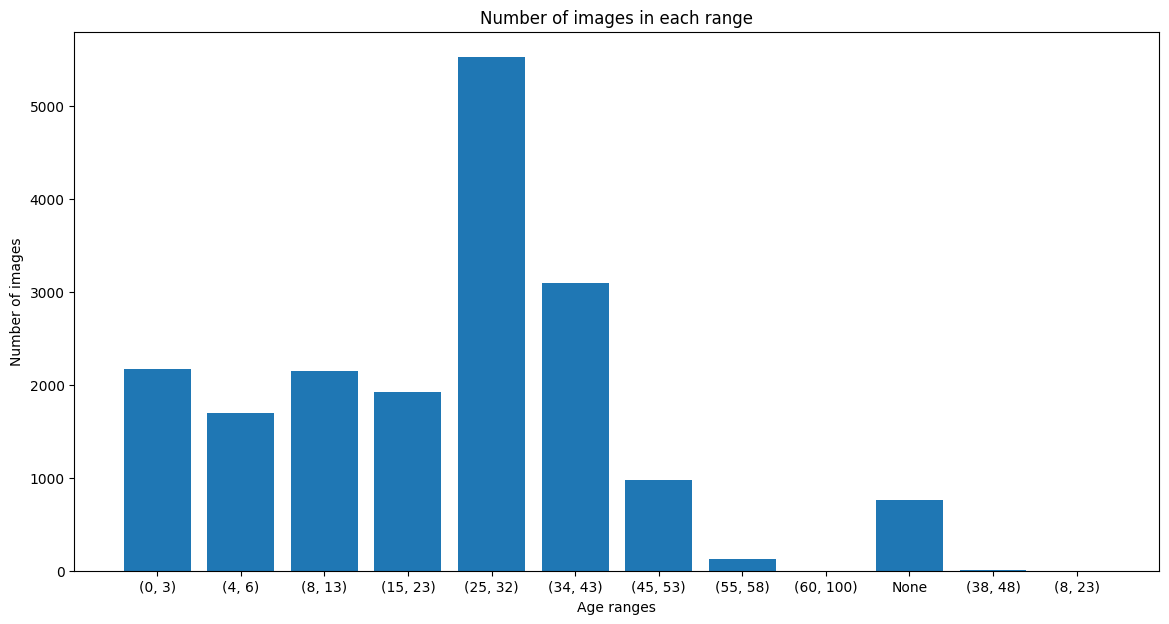

In [10]:
# Show a plot with the age distribution
x_pos = np.arange(len(ds_view))
n_images = [len(ds_view[i]) for i in range(len(ranges))]
fig = plt.figure(dpi=100, figsize=(14, 7)) 
plt.bar(x_pos, n_images, align='center')
plt.xticks(x_pos, ranges)
plt.ylabel('Number of images')
plt.xlabel('Age ranges')
plt.title('Number of images in each range')
plt.show()

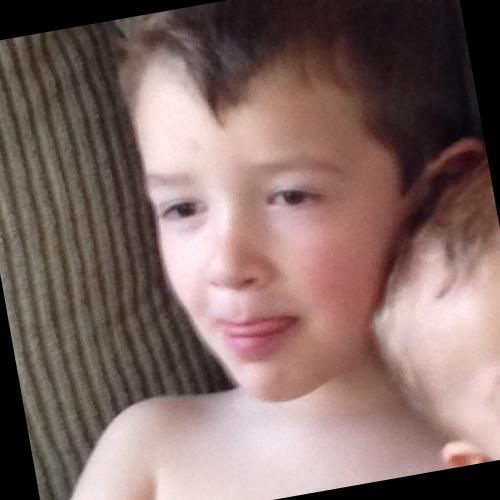

In [11]:
# example of image with age (0,3)y
Image.fromarray(ds_view[0].images[10].numpy())

"class_names": [
  "m",
  "f",
  "u",
  "None"
 ]

In [12]:
# male
ds_view_m = ds.filter(filter_genders(["m"]), scheduler = 'threaded', num_workers = 0)
# female
ds_view_f = ds.filter(filter_genders(["f"]), scheduler = 'threaded', num_workers = 0)
# u
ds_view_u = ds.filter(filter_genders(["u"]), scheduler = 'threaded', num_workers = 0)
# None
ds_view_none = ds.filter(filter_genders("None"), scheduler = 'threaded', num_workers = 0)

print("Male: ",round(len(ds_view_m)/n_tot_images*100, 2),"%")
print("Female: ",round(len(ds_view_f)/n_tot_images*100, 2),"%")
print("Neutral: ",round(len(ds_view_u)/n_tot_images*100, 2),"%")
print("None: ",round(len(ds_view_none)/n_tot_images*100, 2),"%")


100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:03<00:00, 5081.90it/s]

100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:03<00:00, 5246.18it/s]

 42%|███████████████████████████████▊                                           | 8219/19370 [00:01<00:01, 7183.64it/s]


100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:02<00:00, 7137.48it/s]

100%|██████████████████████████████████████████████████████████████████████████| 19370/19370 [00:02<00:00, 7544.66it/s]


Male:  46.28 %
Female:  44.21 %
Neutral:  5.19 %
None:  4.33 %


NameError: name 'ds_view_n' is not defined

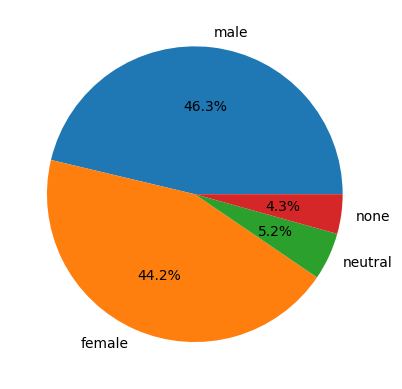

In [16]:

ds_test = [len(ds_view_m), len(ds_view_f), len(ds_view_u), len(ds_view_none)]

plt.pie(ds_test, autopct='%1.1f%%', labels=['male', 'female', 'neutral', 'none'])
#plt.legend()
plt.show()